<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **References**

- https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

### **Install Libraries**

In [2]:
!pip install oryx

### **Import Functions**

In [3]:
from functools import partial

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import jax
import jax.numpy as jnp
from jax import jit, vmap, grad
from jax import random

from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions

import oryx
from oryx.core.ppl import random_variable
from oryx.core.ppl import log_prob
from oryx.core.ppl import joint_sample
from oryx.core.ppl import joint_log_prob
from oryx.core.ppl import block
from oryx.core.ppl import intervene
from oryx.core.ppl import conditional
from oryx.core.ppl import graph_replace
from oryx.core.ppl import nest

## **Normal Random Variable**

In [4]:
def normal(key):
  X = random_variable(tfd.Normal(0., 1.)) # Kind of Random Variable
  return X(key)                          # In Python the sample space is the key. Here the Random Variable maps a key to a value

# Calling the Function
print(normal(random.PRNGKey(0)))

-0.20584226


### **Creating a Bunch of Keys**

In [5]:
a_bunch_of_keys = jax.random.split(jax.random.PRNGKey(0), 500_000)
print(f"There are {len(a_bunch_of_keys)} keys")

There are 500000 keys


### **Evaluating the Random Variable Across a bunch of Keys**

In [6]:
ys = jax.vmap(normal)(a_bunch_of_keys)

### **Plotting**

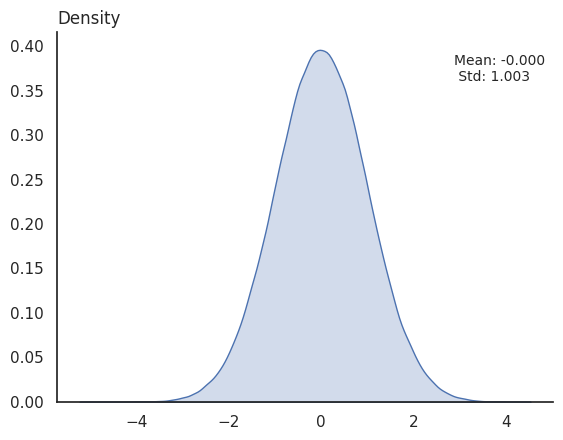

In [7]:
sns.kdeplot(ys, fill=True)
plt.ylabel('')
plt.title('Density', loc='left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate(f'Mean: {jnp.mean(ys):.3f}\n Std: {jnp.std(ys):.3f}',
            xy = (.8, .9),
            xycoords='axes fraction',
            ha='left',
            va="center",
            size=10)

plt.show()

## **Binary Mean**

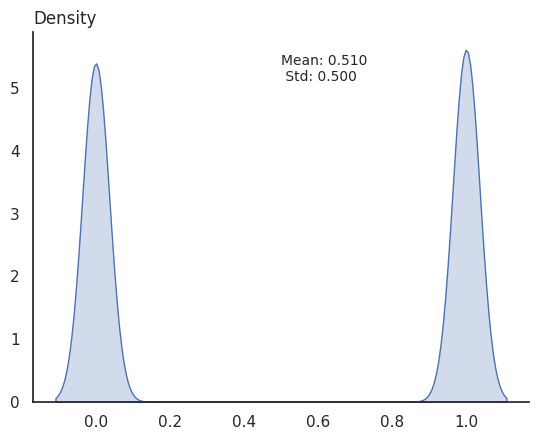

In [8]:
def binary(key):
  X = random_variable(tfd.Bernoulli(probs=0.51)) # Kind of Random Variable
  return X(key)

a_bunch_of_keys = jax.random.split(jax.random.PRNGKey(0), 500_000)

ys = jax.vmap(binary)(a_bunch_of_keys)

sns.kdeplot(ys, fill=True)
plt.ylabel('')
plt.title('Density', loc='left')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate(f'Mean: {jnp.mean(ys):.3f}\n Std: {jnp.std(ys):.3f}',
            xy = (.5, .9),
            xycoords='axes fraction',
            ha='left',
            va="center",
            size=10)

plt.show()

## **Sample Mean**

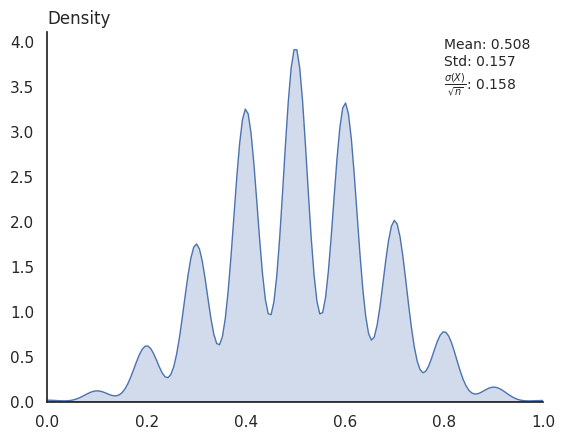

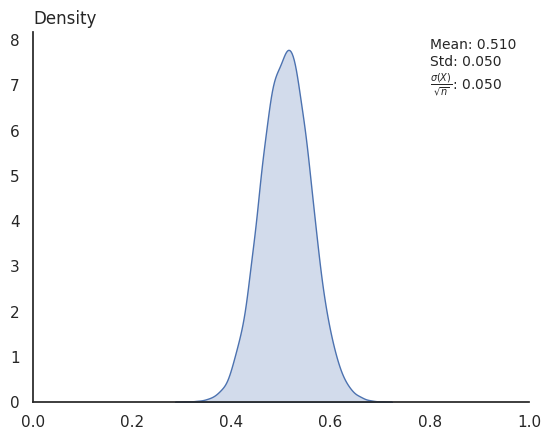

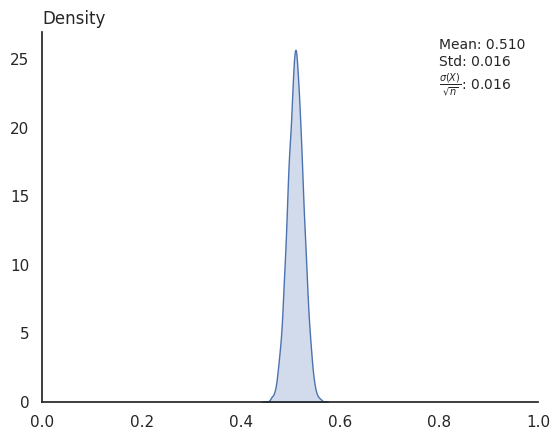

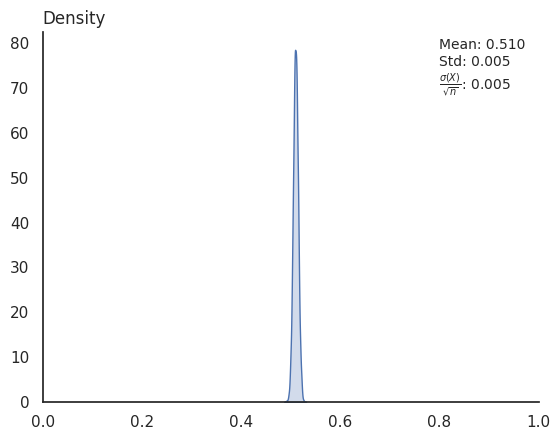

In [16]:
def SampleMean(rv, n, key):
  keys = jax.random.split(key, n)
  ys = jax.vmap(rv)(keys)
  return jnp.mean(ys)


a_bunch_of_keys = jax.random.split(jax.random.PRNGKey(0), 10_000)


for i in [10, 100, 1000, 10000]:
  ys = jax.vmap(partial(SampleMean, binary, i))(a_bunch_of_keys)

  sns.kdeplot(ys, fill=True)
  plt.ylabel('')
  plt.title('Density', loc='left')
  ax = plt.gca()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.annotate(f'Mean: {jnp.mean(ys):.3f}\nStd: {jnp.std(ys):.3f}\n$\\frac{{\\sigma(X)}}{{\\sqrt{{n}}}}$: {jnp.sqrt(0.51*0.49)/jnp.sqrt(i) :.3f}',
              xy = (.8, .9),
              xycoords='axes fraction',
              ha='left',
              va="center",
              size=10)
  plt.xlim(0, 1)
  plt.show()